In [60]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [68]:
df = pd.read_csv('train.csv')

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df = df[['Fare','Age','Survived']]

In [71]:
df.head()

,Fare,Age,Survived
0,7.2500,22.0,0
1,71.2833,38.0,1
2,7.9250,26.0,1
3,53.1000,35.0,1
4,8.0500,35.0,0


In [72]:
df.dropna(inplace=True)

In [73]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [111]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6444833625218914

In [105]:
tf1 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), ['Fare'])
], remainder="passthrough")

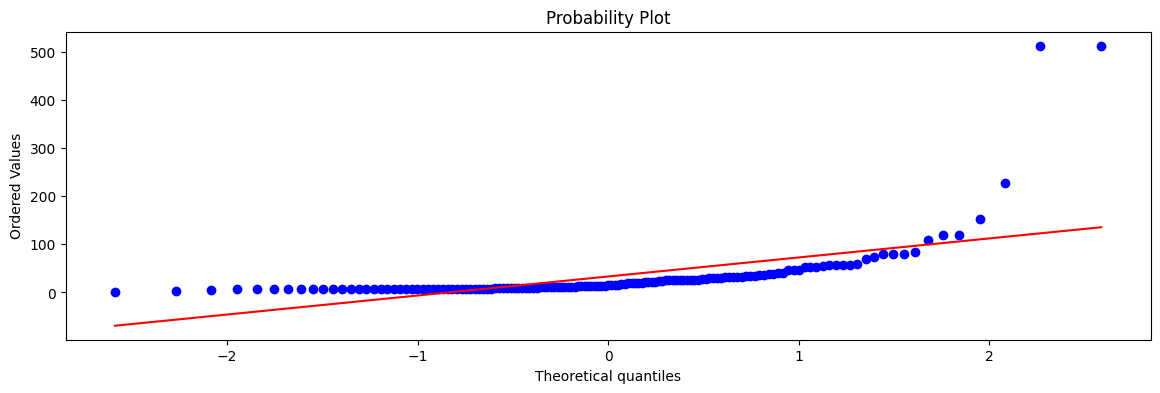

In [106]:
plt.figure(figsize=(14,4))

stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.show()

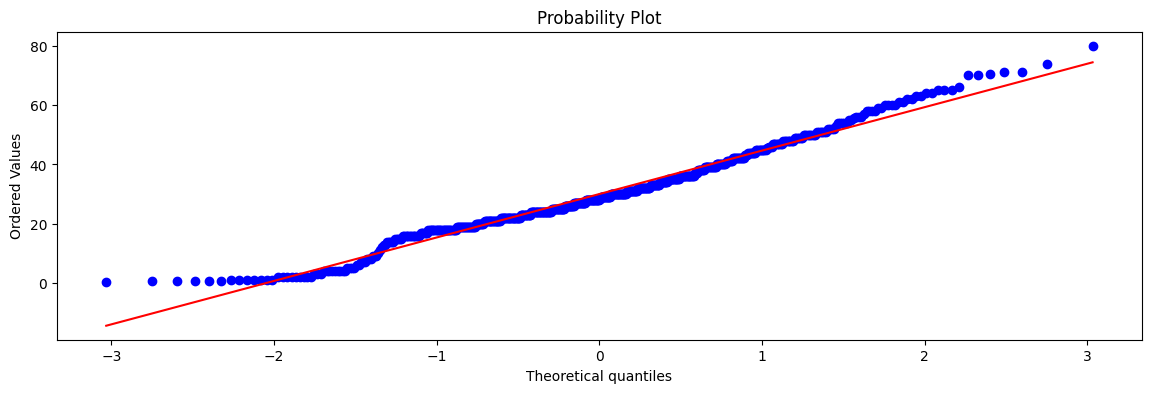

In [108]:
plt.figure(figsize=(14,4))

stats.probplot(x_test_transformed[:, 1], dist="norm", plot=plt)
plt.show()